## Cleaning the data


Now that we have all the data we need to calculate the combined success score lets go ahead and do that. 

First, we will need to calculate a score (max 10) based on the box office performance of the movie.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [38]:
# import merged csv from previous notebook
merged_df = pd.read_csv("merged_box_mv_rt_scripts.csv")

In [39]:
merged_df.head()

,Unnamed: 0,script,movie_name,genre,lifetime_gross,year,belongs_to_collection,genres,original_title,production_companies,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,rt_critic_score,rt_audience_score
0,0,written by Karen McCullah Lutz...,10-things-i-hate-about-you,"['comedy', 'romance']",38178166.0,1999.0,0.0,"['Drama', 'Comedy', 'Romance']",10 Things I Hate About You,"['Jaret Entertainment', 'Mad Chance', 'Touchst...",1999-03-30,53478166.0,97.0,"['Français', 'English']",7.3,1768.0,70.0,69.0
1,1,\n\nFin of red 1957 Chevy Impala convertible d...,12,['comedy'],125120.0,2009.0,0.0,"['Drama', 'Crime']",12,"['venezia 64', 'Mosfilm']",2007-06-06,7537453.0,159.0,"['', 'Pусский', 'Český']",6.6,54.0,0.0,0.0
2,2,\n\n ...,12-and-holding,['drama'],96464.0,2006.0,0.0,['Drama'],Twelve and Holding,['Serenade Films'],2005-09-11,95687.0,90.0,['English'],7.0,20.0,74.0,80.0
3,3,\n\n\t\t An original screenplay by\n\...,12-monkeys,"['drama', 'thriller', 'science-fiction']",57141459.0,1995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,88.0
4,4,\n \n\n\n\n\n ...,127-hours,"['drama', 'adventure', 'thriller']",18335230.0,2010.0,0.0,"['Drama', 'Adventure', 'Thriller']",127 Hours,"['Fox Searchlight Pictures', 'Cloud Eight Film...",2010-11-05,35692920.0,94.0,['English'],7.0,2668.0,93.0,85.0


In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             957 non-null    int64  
 1   script                 940 non-null    object 
 2   movie_name             957 non-null    object 
 3   genre                  957 non-null    object 
 4   lifetime_gross         865 non-null    float64
 5   year                   865 non-null    float64
 6   belongs_to_collection  925 non-null    float64
 7   genres                 925 non-null    object 
 8   original_title         925 non-null    object 
 9   production_companies   925 non-null    object 
 10  release_date           925 non-null    object 
 11  revenue                925 non-null    float64
 12  runtime                925 non-null    float64
 13  spoken_languages       925 non-null    object 
 14  vote_average           925 non-null    float64
 15  vote_c

In [41]:
# fill the NaN values in the lifetime_gross and year columns with zeroes
merged_df['lifetime_gross'] = merged_df['lifetime_gross'].fillna(0).astype(int)
merged_df['year'] = merged_df['year'].fillna(0).astype(int)

In [42]:
# convert the lifetime_gross and year columns to integer
merged_df = merged_df.astype({"lifetime_gross":"int","year":"int"})
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])

<AxesSubplot:>

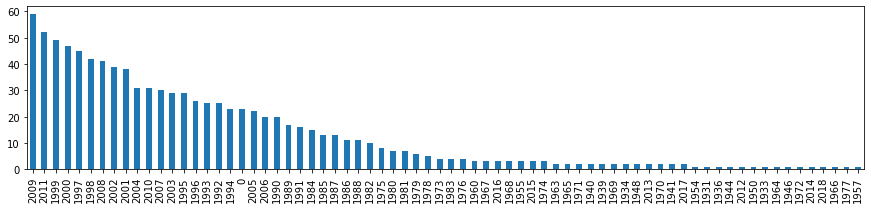

In [43]:
merged_df['year'] = merged_df.apply(lambda x: x['release_date'].year if x['year'] == 0 else x['year'], axis=1)
merged_df['year'] = merged_df['year'].fillna(0).astype(int)
merged_df = merged_df.astype({"lifetime_gross":"int","year":"int"})

plt.figure(figsize=(15, 3))
merged_df['year'].value_counts().plot(kind ='bar')

In [44]:
# import the box office dataset from kaggle
bo_df = pd.read_csv("boxoffice.csv")

In [45]:
# check the highest gross for any movie per year
bo_df.groupby(["year"])["lifetime_gross"].max()

year
1921      9183673
1926       814000
1927      1236166
1931        19181
1936       163577
          ...    
2014    350126372
2015    936662225
2016    532177324
2017    620181382
2018    700059566
Name: lifetime_gross, Length: 82, dtype: int64

In [46]:
max_bo_df = pd.DataFrame(bo_df.groupby(["year"])["lifetime_gross"].max())

max_bo_df = max_bo_df.rename(columns={'lifetime_gross': 'max_gross'}).reset_index()

max_bo_df.head()

,year,max_gross
0,1921,9183673
1,1926,814000
2,1927,1236166
3,1931,19181
4,1936,163577


In [47]:
# merge the max_gross values with the merged_df with a left join on year
merged_df = pd.merge(merged_df, max_bo_df, how='left', on='year')
merged_df


,Unnamed: 0,script,movie_name,genre,lifetime_gross,year,belongs_to_collection,genres,original_title,production_companies,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,rt_critic_score,rt_audience_score,max_gross
0,0,written by Karen McCullah Lutz...,10-things-i-hate-about-you,"['comedy', 'romance']",38178166,1999,0.0,"['Drama', 'Comedy', 'Romance']",10 Things I Hate About You,"['Jaret Entertainment', 'Mad Chance', 'Touchst...",1999-03-30,53478166.0,97.0,"['Français', 'English']",7.3,1768.0,70.0,69.0,474544677.0
1,1,\n\nFin of red 1957 Chevy Impala convertible d...,12,['comedy'],125120,2009,0.0,"['Drama', 'Crime']",12,"['venezia 64', 'Mosfilm']",2007-06-06,7537453.0,159.0,"['', 'Pусский', 'Český']",6.6,54.0,0.0,0.0,760507625.0
2,2,\n\n ...,12-and-holding,['drama'],96464,2006,0.0,['Drama'],Twelve and Holding,['Serenade Films'],2005-09-11,95687.0,90.0,['English'],7.0,20.0,74.0,80.0,423315812.0
3,3,\n\n\t\t An original screenplay by\n\...,12-monkeys,"['drama', 'thriller', 'science-fiction']",57141459,1995,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,88.0,88.0,191796233.0
4,4,\n \n\n\n\n\n ...,127-hours,"['drama', 'adventure', 'thriller']",18335230,2010,0.0,"['Drama', 'Adventure', 'Thriller']",127 Hours,"['Fox Searchlight Pictures', 'Cloud Eight Film...",2010-11-05,35692920.0,94.0,['English'],7.0,2668.0,93.0,85.0,415004880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,952,\n\n Wr...,yes-man,"['comedy', 'romance']",97690976,2008,0.0,['Comedy'],Yes Man,"['Village Roadshow Pictures', 'The Zanuck Comp...",2008-12-09,225990978.0,104.0,"['한국어/조선말', 'English', 'Eesti']",6.4,1869.0,46.0,66.0,534858444.0
953,953,"""YOU CAN COU...",you-can-count-on-me,['drama'],9183362,2000,0.0,"['Drama', 'Romance']",You Can Count on Me,"['Cappa Productions', 'Hart-Sharp Entertainmen...",2000-11-17,0.0,111.0,['English'],6.8,89.0,95.0,88.0,260044825.0
954,954,\n\n\n\n\n\n ...,youth-in-revolt,"['romance', 'drama', 'comedy']",15281286,2010,0.0,"['Drama', 'Comedy', 'Romance']",Youth in Revolt,['Dimension Films'],2009-09-11,0.0,87.0,"['Français', 'English']",5.9,323.0,66.0,52.0,415004880.0
955,955,\t\t\tYou've Got Mail\n\n\t\t\tby Nora Ephron ...,youve-got-mail,"['romance', 'comedy']",115821495,1998,0.0,"['Comedy', 'Romance']",You've Got Mail,['Warner Bros.'],1998-12-17,250821495.0,119.0,['English'],6.3,859.0,69.0,73.0,216540909.0


Now that we have the max box office score per year, lets calculate a score for the box office performance of a movie,

            box office score = (lifetime gross of movie / max gross of any movie that year) * 10

In [48]:
# calculate the box_office_score

merged_df['box_office_score'] = (merged_df['lifetime_gross']/merged_df['max_gross']) * 10

In [49]:
merged_df['year'].value_counts()

2009    59
2011    52
1999    49
2000    47
1997    45
        ..
2014     1
2018     1
1966     1
1977     1
1957     1
Name: year, Length: 72, dtype: int64

In [50]:
# renaming the vote_average column to imdb_score

merged_df = merged_df.rename(columns={'vote_average': 'imdb_score'})

<AxesSubplot:>

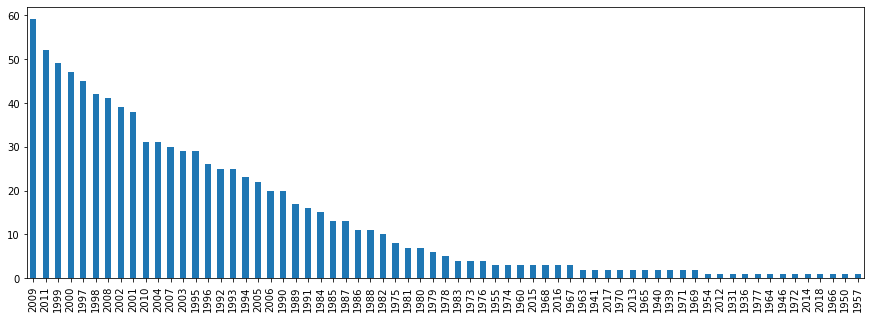

In [61]:
plt.figure(figsize=(15, 5))
merged_df['year'].value_counts().plot(kind ='bar')


Let's use the Box office score, Rotten tomatoes scores and the IMDB score to calculate a combined success score with the following weights:

    - Box office score (0.4)
    - Rotten tomatoes audience (0.2)
    - Rotten tomatoes critic (0.2)
    - IMDB score (0.2)

In [52]:
merged_df = merged_df[merged_df['box_office_score'].notna()]
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 956
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             928 non-null    int64         
 1   script                 911 non-null    object        
 2   movie_name             928 non-null    object        
 3   genre                  928 non-null    object        
 4   lifetime_gross         928 non-null    int32         
 5   year                   928 non-null    int32         
 6   belongs_to_collection  919 non-null    float64       
 7   genres                 919 non-null    object        
 8   original_title         919 non-null    object        
 9   production_companies   919 non-null    object        
 10  release_date           919 non-null    datetime64[ns]
 11  revenue                919 non-null    float64       
 12  runtime                919 non-null    float64       
 13  spoke

In [54]:
merged_df[['rt_audience_score', 'rt_critic_score', 'imdb_score']] = merged_df[['rt_audience_score', 'rt_critic_score', 'imdb_score']].fillna(-1)

In [55]:
# create the combined score from all availabl scores with weight based on score availability.
# box office score has the highest weightage.

def success_score(row):
    bo_score = row['box_office_score']
    rt_aud_score = row['rt_audience_score']
    rt_critic_score = row['rt_critic_score']
    imdb_score = row['imdb_score']

    if rt_aud_score != -1:
        if rt_critic_score != -1:
            if imdb_score != -1:
                score = (bo_score*0.4 + rt_aud_score*0.2/10 
                        + rt_critic_score*0.2/10 + imdb_score*0.2)*10
            else:
                score = (bo_score*0.5 + rt_aud_score*0.25/10 
                        + rt_critic_score*0.25/10)*10
        else:
            if imdb_score != -1:
                score = (bo_score*0.5 + rt_aud_score*0.25/10 
                         + imdb_score*0.25)*10
            else:
                score = (bo_score*0.6 + rt_aud_score*0.4/10)*10
    else:
            if rt_critic_score != -1:
                if imdb_score != -1:
                    score = (bo_score*0.5 +  
                            + rt_critic_score*0.25/10 + imdb_score*0.25)*10
                else:
                    score = (bo_score*0.6 + rt_aud_score*0.4/10)*10
            else:
                if imdb_score != -1:
                    score = (bo_score*0.6 + imdb_score*0.4)*10
                else:
                    score = bo_score*10
    return score
                    

        

In [56]:
merged_df['success_score_1'] = merged_df.apply(success_score, axis=1)

In [35]:
merged_df[merged_df['script'].isnull()]

,Unnamed: 0,script,movie_name,genre,lifetime_gross,year,belongs_to_collection,genres,original_title,production_companies,...,runtime,spoken_languages,imdb_score,vote_count,rt_critic_score,rt_audience_score,max_gross,box_office_score,success_score,success_score_1
11,11,NaN,25th-hour,"['drama', 'crime']",13084595,2002,0.0,"['Drama', 'Crime']",25th Hour,"['Touchstone Pictures', '40 Acres & A Mule Fil...",...,135.0,['English'],7.2,640.0,79.0,85.0,403706375.0,0.324112,48.496447,48.496447
74,74,NaN,apollo-13,"['adventure', 'drama']",173837933,1995,0.0,['Drama'],Apollo 13,"['Universal Pictures', 'Imagine Entertainment']",...,140.0,['English'],7.3,1637.0,96.0,87.0,191796233.0,9.063678,87.454713,87.454713
114,114,NaN,benny-and-joon,"['romance', 'comedy']",23261580,1993,0.0,"['Drama', 'Comedy', 'Romance']",Benny & Joon,"['Roth-Arnold Productions', 'Metro-Goldwyn-May...",...,98.0,"['Português', 'English']",6.9,220.0,76.0,85.0,402453882.0,0.577994,48.311975,48.311975
163,163,NaN,catwoman,"['crime', 'action']",40202379,2004,0.0,"['Action', 'Crime']",Catwoman,"['Frantic Films', 'Catwoman Films', 'DiNovi Pi...",...,104.0,"['Español', 'English']",4.2,833.0,9.0,18.0,441226247.0,0.911151,17.444604,17.444604
186,186,NaN,collateral,"['crime', 'action', 'thriller']",101005703,2004,0.0,"['Drama', 'Crime', 'Thriller']",Collateral,"['Parkes/MacDonald Productions', 'Paramount Pi...",...,120.0,"['Español', 'English']",7.0,1476.0,86.0,84.0,441226247.0,2.289204,57.156817,57.156817
216,216,NaN,days-of-heaven,['drama'],3446749,1978,0.0,"['Drama', 'Romance']",Days of Heaven,['Paramount Pictures'],...,94.0,"['Italiano', 'English']",7.6,236.0,93.0,89.0,188755690.0,0.182604,52.330415,52.330415
248,248,NaN,el-mariachi,"['western', 'action', 'crime', 'thriller']",2040920,1993,1.0,"['Action', 'Crime', 'Thriller']",El Mariachi,['Columbia Pictures'],...,81.0,['Español'],6.6,243.0,91.0,76.0,402453882.0,0.050712,46.802848,46.802848
306,306,NaN,get-shorty,"['comedy', 'crime', 'drama', 'action']",72101622,1995,1.0,"['Comedy', 'Crime', 'Thriller']",Get Shorty,"['Metro-Goldwyn-Mayer (MGM)', 'Jersey Films']",...,105.0,['English'],6.4,305.0,88.0,70.0,191796233.0,3.759282,59.437130,59.437130
514,514,NaN,napoleon-dynamite,['comedy'],44540956,2004,0.0,['Comedy'],Napoleon Dynamite,"['Fox Searchlight Pictures', 'Paramount Pictur...",...,95.0,['English'],6.7,567.0,72.0,74.0,441226247.0,1.009481,46.637924,46.637924
535,535,NaN,omega-man,"['thriller', 'science-fiction', 'drama']",0,2010,0.0,"['Drama', 'Action', 'Science Fiction']",Mega Man,[],...,93.0,['English'],4.0,1.0,64.0,53.0,415004880.0,0.000000,31.400000,31.400000


In [57]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 956
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             928 non-null    int64         
 1   script                 911 non-null    object        
 2   movie_name             928 non-null    object        
 3   genre                  928 non-null    object        
 4   lifetime_gross         928 non-null    int32         
 5   year                   928 non-null    int32         
 6   belongs_to_collection  919 non-null    float64       
 7   genres                 919 non-null    object        
 8   original_title         919 non-null    object        
 9   production_companies   919 non-null    object        
 10  release_date           919 non-null    datetime64[ns]
 11  revenue                919 non-null    float64       
 12  runtime                919 non-null    float64       
 13  spoke

In [ ]:
# merge the max_gross values with the merged_df with a left join on year
# merged_df = pd.merge(merged_df, year_0_df, how='left', on='movie_name')
# merged_df

In [ ]:
merged_df.groupby(["year"])["script"].count()

In [ ]:
merged_df.info()

In [31]:
merged_df.drop('revenue',axis= 1)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 956
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             928 non-null    int64         
 1   script                 911 non-null    object        
 2   movie_name             928 non-null    object        
 3   genre                  928 non-null    object        
 4   lifetime_gross         928 non-null    int32         
 5   year                   928 non-null    int32         
 6   belongs_to_collection  919 non-null    float64       
 7   genres                 919 non-null    object        
 8   original_title         919 non-null    object        
 9   production_companies   919 non-null    object        
 10  release_date           919 non-null    datetime64[ns]
 11  revenue                919 non-null    float64       
 12  runtime                919 non-null    float64       
 13  spoke

In [72]:
merged_df[merged_df['script'].isnull()]

,script,movie_name,genre,year,belongs_to_collection,genres,release_date,runtime,spoken_languages,success_score
11,NaN,25th-hour,"['drama', 'crime']",2002,0.0,"['Drama', 'Crime']",2002-12-16,135.0,['English'],48.496447
74,NaN,apollo-13,"['adventure', 'drama']",1995,0.0,['Drama'],1995-06-30,140.0,['English'],87.454713
114,NaN,benny-and-joon,"['romance', 'comedy']",1993,0.0,"['Drama', 'Comedy', 'Romance']",1993-04-16,98.0,"['Português', 'English']",48.311975
163,NaN,catwoman,"['crime', 'action']",2004,0.0,"['Action', 'Crime']",2004-07-22,104.0,"['Español', 'English']",17.444604
186,NaN,collateral,"['crime', 'action', 'thriller']",2004,0.0,"['Drama', 'Crime', 'Thriller']",2004-08-04,120.0,"['Español', 'English']",57.156817
216,NaN,days-of-heaven,['drama'],1978,0.0,"['Drama', 'Romance']",1978-09-13,94.0,"['Italiano', 'English']",52.330415
248,NaN,el-mariachi,"['western', 'action', 'crime', 'thriller']",1993,1.0,"['Action', 'Crime', 'Thriller']",1992-09-04,81.0,['Español'],46.802848
306,NaN,get-shorty,"['comedy', 'crime', 'drama', 'action']",1995,1.0,"['Comedy', 'Crime', 'Thriller']",1995-10-20,105.0,['English'],59.437130
514,NaN,napoleon-dynamite,['comedy'],2004,0.0,['Comedy'],2004-06-11,95.0,['English'],46.637924
535,NaN,omega-man,"['thriller', 'science-fiction', 'drama']",2010,0.0,"['Drama', 'Action', 'Science Fiction']",2010-05-07,93.0,['English'],31.400000


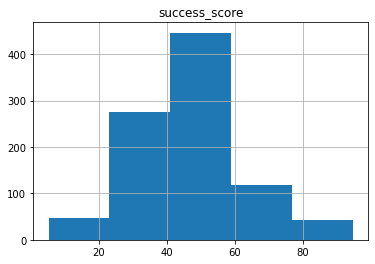

In [75]:
p = merged_df.hist(column='success_score',bins= 5)


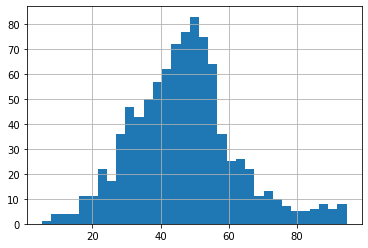

In [81]:
merged_df['success_score'].hist(bins=33)
plt.savefig('hist_success_score.png')

In [ ]:
merged_df = merged_df.rename(columns={'success_score_1': 'success_score'})

In [63]:
# drop all the unrequired features

merged_df = merged_df.drop(['Unnamed: 0','original_title','production_companies','revenue','vote_count',
                            'rt_critic_score','rt_audience_score','imdb_score','lifetime_gross',
                            'max_gross','box_office_score'], axis=1)

In [68]:
merged_df.to_csv('merged_df.csv')

In [69]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 956
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   script                 911 non-null    object        
 1   movie_name             928 non-null    object        
 2   genre                  928 non-null    object        
 3   year                   928 non-null    int32         
 4   belongs_to_collection  919 non-null    float64       
 5   genres                 919 non-null    object        
 6   release_date           919 non-null    datetime64[ns]
 7   runtime                919 non-null    float64       
 8   spoken_languages       919 non-null    object        
 9   success_score          928 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(5)
memory usage: 108.4+ KB
